# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# !pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

20

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL

# for city in cities: 
    
#     query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"  
# #     print(query_url)
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()
#     pprint(weather_json)




In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"


lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
record_set = -1
length = len(cities)
cities_found = []
# from datetime import datetime as dt

for city in cities: 
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city+ "&units=imperial" 
#     print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
#     pprint(weather_json)
# place an exception handling here       
    record += 1
    try: 
        
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        cities_found.append(weather_json['name'])
    
    except:
        print ("city not found")
        
        
    print(f"{city}: record = {record}")

port elizabeth: record = 1
buala: record = 2
qaanaaq: record = 3
rikitea: record = 4
hay river: record = 5
beaupre: record = 6
kota bahru: record = 7
sitka: record = 8
atbasar: record = 9
mataura: record = 10
city not found
coulihaut: record = 11
punta arenas: record = 12
butaritari: record = 13
hithadhoo: record = 14
cape town: record = 15
constitucion: record = 16
city not found
tabiauea: record = 17
linxia: record = 18
pihuamo: record = 19
apatin: record = 20


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_data = pd.DataFrame({"City": cities_found,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date})

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.92,25.57,64.40,88,0,10.29,ZA,1604275815
1,Buala,-8.14,159.59,87.62,64,76,4.29,SB,1604275816
2,Qaanaaq,77.48,-69.36,2.82,74,0,6.69,GL,1604275974
3,Rikitea,-23.12,-134.97,74.37,85,88,23.13,PF,1604275754
4,Hay River,60.82,-115.80,19.40,79,100,17.22,CA,1604275816
5,Beaupré,47.04,-70.90,42.01,93,97,3.36,CA,1604275817
6,Kota Bharu,6.13,102.24,77.00,100,40,3.36,MY,1604275817
7,Sitka,57.05,-135.33,48.20,87,90,20.80,US,1604275782
8,Atbasar,51.80,68.33,36.59,84,97,11.25,KZ,1604275817
9,Mataura,-46.19,168.86,55.00,65,57,11.99,NZ,1604275818


In [14]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01
mean,9.418333,7.666111,55.761667,80.166667,46.611111,9.008889,1.604276e+09
std,41.399434,107.372266,23.093766,9.382399,42.137225,6.103051,5.155351e+01
min,-53.150000,-135.330000,2.820000,64.000000,0.000000,1.070000,1.604276e+09
25%,-31.220000,-72.045000,43.557500,74.500000,0.000000,4.672500,1.604276e+09
50%,4.600000,18.700000,54.300000,79.000000,47.000000,8.050000,1.604276e+09
75%,46.697500,94.950000,75.682500,86.500000,89.500000,11.010000,1.604276e+09
max,77.480000,172.790000,87.620000,100.000000,100.000000,23.130000,1.604276e+09


In [56]:
#writing to a CSV

weather_data.to_csv(output_data_file, index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
humid_cities = weather_data[weather_data["Humidity"] > 90].index

In [20]:
#  Get the indices of cities that have humidity over 100%.
humid_cities

Int64Index([5, 6], dtype='int64')

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(humid_cities, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.92,25.57,64.40,88,0,10.29,ZA,1604275815
1,Buala,-8.14,159.59,87.62,64,76,4.29,SB,1604275816
2,Qaanaaq,77.48,-69.36,2.82,74,0,6.69,GL,1604275974
3,Rikitea,-23.12,-134.97,74.37,85,88,23.13,PF,1604275754
4,Hay River,60.82,-115.80,19.40,79,100,17.22,CA,1604275816
7,Sitka,57.05,-135.33,48.20,87,90,20.80,US,1604275782
8,Atbasar,51.80,68.33,36.59,84,97,11.25,KZ,1604275817
9,Mataura,-46.19,168.86,55.00,65,57,11.99,NZ,1604275818
10,Punta Arenas,-53.15,-70.92,53.60,76,0,8.05,CL,1604275770
11,Butaritari,3.07,172.79,82.11,76,32,9.24,KI,1604275818


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

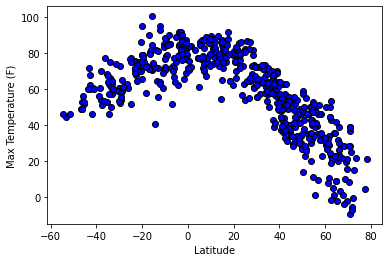

In [57]:
# Generate a scatter plot of latidude vs. Max Temperature

# scatter_plot_df

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

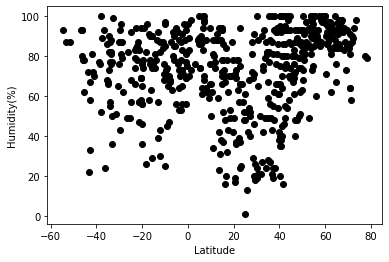

In [58]:
# Generate a scatter plot of latidude vs. Humidity

# scatter_plot_df

plt.scatter(lat, humidity, marker="o", facecolors="black", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness(%)')

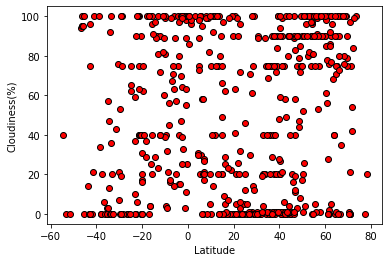

In [59]:
plt.scatter(lat, cloudiness, marker="o", facecolors="red", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

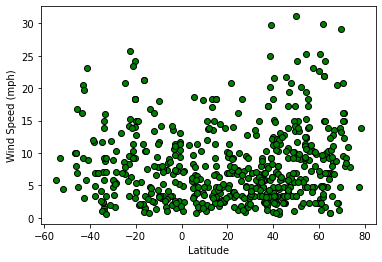

In [60]:
plt.scatter(lat, wind_speed, marker="o", facecolors="green", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [62]:
weather_data.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

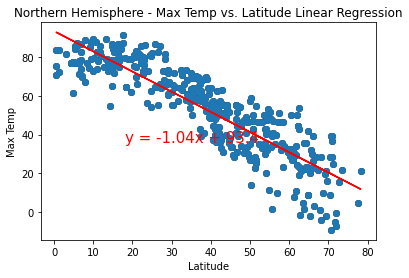

In [63]:
north_hemi = weather_data.loc[weather_data['Lat'] > 0 ]
# north_hemi

x_values = north_hemi ["Lat"]
y_values = north_hemi["Max Temp"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
# north_hemi
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

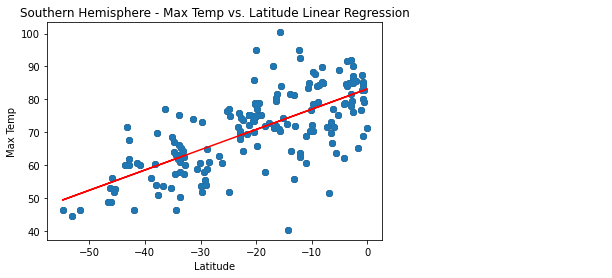

In [64]:
south_hemi = weather_data.loc[weather_data['Lat'] < 0 ]
# south_hemi

x_values = south_hemi ["Lat"]
y_values = south_hemi["Max Temp"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

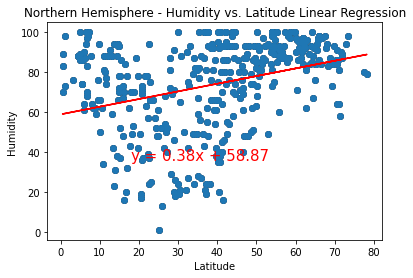

In [65]:
x_values = north_hemi ["Lat"]
y_values = north_hemi["Humidity"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

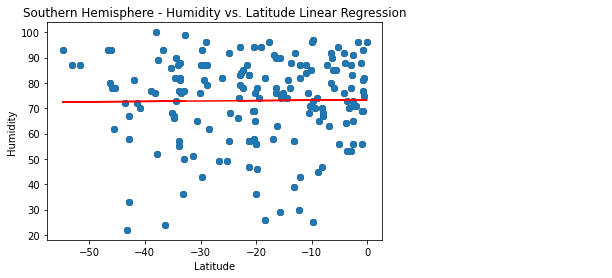

In [66]:
x_values = south_hemi ["Lat"]
y_values = south_hemi["Humidity"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

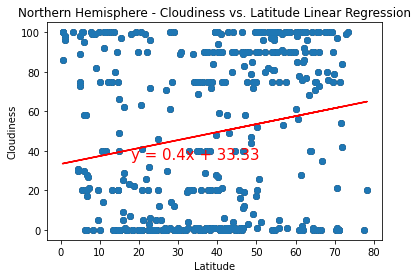

In [67]:
x_values = north_hemi ["Lat"]
y_values = north_hemi["Cloudiness"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

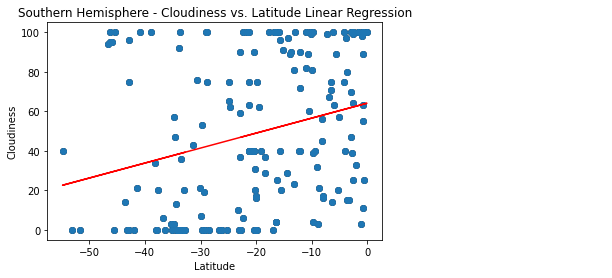

In [68]:
x_values = south_hemi ["Lat"]
y_values = south_hemi["Cloudiness"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

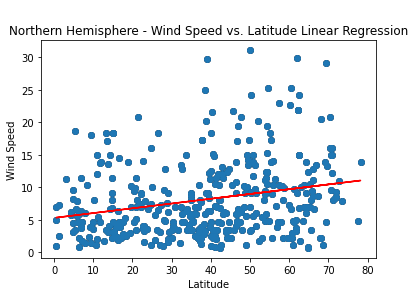

In [69]:
x_values = north_hemi ["Lat"]
y_values = north_hemi["Wind Speed"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

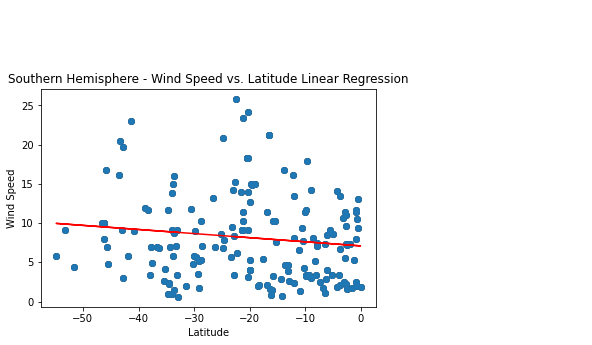

In [70]:
x_values = south_hemi ["Lat"]
y_values = south_hemi["Wind Speed"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()